In [9]:

import funcionesCalculo as ft
import numpy as np
import openpyxl
import matplotlib.pyplot as plt

# datos geometricos del terraplen y del mallado obtenido de la excel datos_terraplen.xlsx
a,b,h,q,ax,incrx,incrz=ft.datos_terraplen()


# importacion de datos del terreno
espesor,cotas,az,nivel_freatico,pe_seco,pe_saturado,E,poisson,cohesion,fi,cc,e0,tipo_datos=ft.datos_terreno()

# definicion e iniciación de las matrices y vectores para albergar los cálculos
#xcoord=np.arange(ax,b+incrx,incrx)
xcoord=np.arange(-(ax+b),ax+b+incrx,incrx) # cubre los dos bordes del terraplén
zcoord=np.arange(0.0001,az+incrz,incrz)
tension_z=np.zeros((zcoord.size,xcoord.size))
tension_x=np.zeros((zcoord.size,xcoord.size))
tension_xz=np.zeros((zcoord.size,xcoord.size))
tension_z_terreno=np.zeros((zcoord.size,xcoord.size))
asientos_z=np.zeros((1,xcoord.size))





In [10]:
# realización de los cálculos de tensiones y asientos bajo la carga del terraplén
asiento=[]
asiento_parcial=0
xarray=0
for x in xcoord:
    zarray=0
    for z in zcoord:

        tensionz,tensionx,tensionxz=ft.tension_terraplen(a,b,q,x+b,z)
            # llamada a la funcion de tensiones de carga terraplén
   

        # tensiones naturales del terreno verticales y horizontales
        tension_z_0=ft.tension_total(z,cotas,pe_saturado,pe_seco,nivel_freatico) 
        
        # construcción de las matrices de datos
        tension_z[zarray,xarray]=tensionz # tensiones normales en z
        tension_x[zarray,xarray]=tensionx # tensiones normales en x
        tension_xz[zarray,xarray]=tensionxz # tensiones cortantes en xz
        tension_z_terreno[zarray,xarray]=tension_z_0 # tension natural del terreno en z
        zarray+=1
         
         # aqui se calculará la parte de los asientos
        asiento_parcial+=ft.asiento_elastico(cotas,z,incrz,E,poisson,tensionx,tensionz)

    asiento.append(asiento_parcial)
    xarray+=1
    asiento_parcial=0 # se reinicia el asiento a cero para el siguiente cálculo


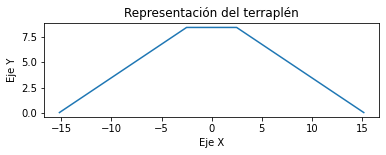

In [11]:
fig, ax = plt.subplots()

x = [-b,-(b-a),0,b-a,b]
y=[0,h,h,h,0]
plt.plot(x,y)
ax.set_aspect('equal', adjustable='box')
plt.ylabel("Eje Y")
plt.xlabel("Eje X")
ax.set_title('Representación del terraplén')
plt.show()

In [12]:
max(xcoord)

20.3